Let's use this notebook for some experiments. 

In [2]:
from NMF import *
%matplotlib inline

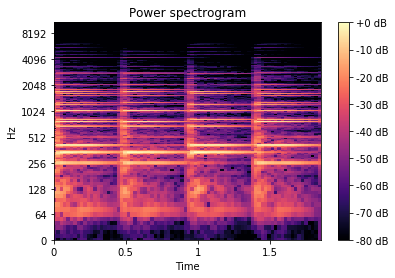

In [3]:
filename = './data/test.wav'
ViolinRecording = Recording(filename)
ViolinSpectrogram = ViolinRecording.compute_spectrogram()
ViolinSpectrogram.visualize()
ViolinSpectrogram.restore_recording("./data/exp.wav")
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
# matrix_to_factorize = NMF(ViolinSpectrogram.spectrogram)
W, H, WH = matrix_to_factorize.factorize_EM_IS(10, 5000)
C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)

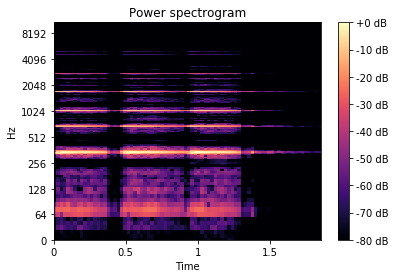

In [14]:
new_spectrogram = Spectrogram(C_matrices[0], ViolinSpectrogram.fs)
new_spectrogram.visualize()
new_spectrogram.restore_recording("./data/exp_note.wav")

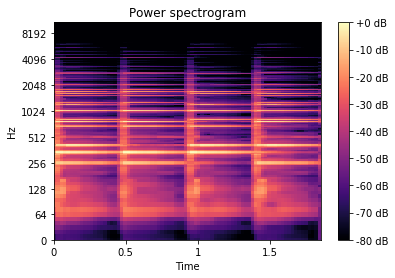

In [15]:
new_spectrogram = Spectrogram(np.sqrt(WH), ViolinSpectrogram.fs)
new_spectrogram.visualize()
new_spectrogram.restore_recording("./data/exp_full.wav")

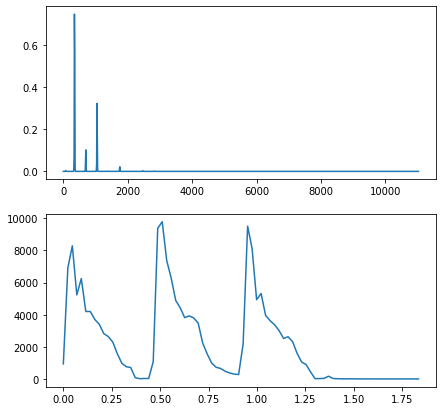

In [16]:
plot_freq_time(W, H, )